In [1]:
import sys
sys.path.append("../02_src/02_lib/")
from matplotlib import pyplot as plt

from traffic_light import *

Tempo inicial da execucao: 2023-10-14 00:32:43.325073


### Primeira parte sem a parte gráfica, com a coleta de dados

In [2]:
STEP_TOTAL = 5000
SEED = 48102093
sumo_cmd = ['sumo', 
            '--duration-log.statistics', 
            '-c', '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.sumo.cfg']

In [3]:
intelligent_intersection = Intelligent_Intersection(SEED)
intelligent_intersection.start(sumo_cmd,STEP_TOTAL)

 Retrying in 1 seconds
***Starting server on port 42771 ***
Loading net-file from '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.net.xml' ... done (10ms).
Loading done.
Simulation version 1.18.0 started with time: 0.00.
Step #50.00 (0ms ?*RT. ?UPS, TraCI: 6ms, vehicles TOT 43 ACT 24 BUF 0)                    tep #45.00 (1ms ~= 10.00*RT, ~27000.00UPS, TraCI: 6ms, vehicles TOT 40 ACT 27 BUF 0)     
Simulation ended at time: 50.00
Reason: TraCI requested termination.
Performance: 
 Duration: 24.65s
 TraCI-Duration: 24.04s
 Real time factor: 2.02848
 UPS: 4377.256684
Vehicles: 
 Inserted: 43
 Running: 24
 Waiting: 0
Statistics (avg of 19):
 RouteLength: 892.74
 Speed: 26.00
 Duration: 34.38
 WaitingTime: 0.00
 TimeLoss: 1.95
 DepartDelay: 0.00



In [4]:
intelligent_intersection.seed

48102093

In [5]:
df = intelligent_intersection.veh_data.merge_veh_data()
df.head()

,step,key,route,odometry,speed,timeLoss,current_time,desired_speed,distance_to_stop_line,max_leaving_time,leaving_time,duration
0,1,v.0.0.0,0,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
1,1,v.0.1.0,1,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
2,1,v.0.4.0,4,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
3,1,v.0.6.0,6,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
4,1,v.0.7.0,7,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0


In [6]:
# Coleta de todos os veículos que ja ultrapassaram o semáforo
lista_veiculos_apos_semaforo = list(set(df.groupby(['key'])['key'].count().index) - set(intelligent_intersection.topology.keys()))

to_plot = df.query("key in "+str(lista_veiculos_apos_semaforo))

Total number of veh.: 21      
Average delay (s):[2.08334697]      
Variance:[0.23393771]


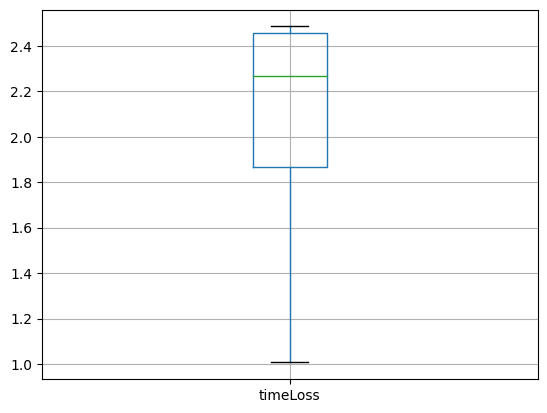

In [7]:
df_timeLoss  = to_plot.groupby(['key'])[['timeLoss']].last()
print("Total number of veh.: {}\
      \nAverage delay (s):{}\
      \nVariance:{}".format(len(df_timeLoss.index),df_timeLoss.mean().values,df_timeLoss.var().values))
ax = df_timeLoss.boxplot()
plt.show()

In [8]:
print("TimeLoss Negatigo:",len(df_timeLoss.query("timeLoss < 0")))

TimeLoss Negatigo: 0


DURATION 	 MAX [34.3] 	-	MIN [30.6]


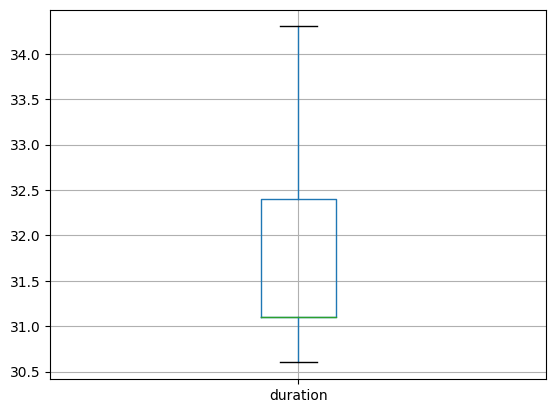

In [9]:
duration = to_plot.groupby(['key'])[['duration']].last()
print("DURATION \t MAX {} \t-\tMIN {}".format(duration.max().values,duration.min().values))
ax = to_plot.groupby(['key'])[['duration']].last().boxplot()
plt.show()

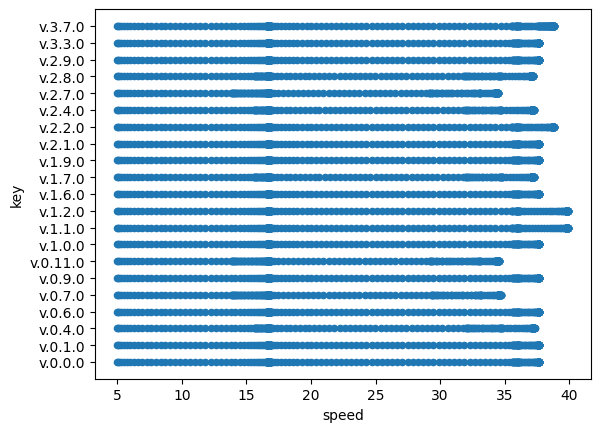

In [10]:
ax = to_plot[['key','speed']].plot(x='speed', y='key',kind='scatter')
plt.show()

In [11]:
print("Exemplo das variáveis:\
       \n\nserving_list =>[veh, route, leaving_time, priority]:\n{}\
       \n\nserving_list_veh_only:\n{}\
       \n\ntopology:\n{}\
       \n\nTotal de Passos:{}\
       ".format(intelligent_intersection.serving_list[0],
               intelligent_intersection.serving_list_veh_only[0],
               intelligent_intersection.topology.popitem(),
               intelligent_intersection.step))

Exemplo das variáveis:       

serving_list =>[veh, route, leaving_time, priority]:
['v.5.2.0', 2, 1.046141538292176, 0]       

serving_list_veh_only:
v.5.2.0       

topology:
('v.8.4.0', {})       

Total de Passos:5000       


In [12]:
df.key.head()

0    v.0.0.0
1    v.0.1.0
2    v.0.4.0
3    v.0.6.0
4    v.0.7.0
Name: key, dtype: object

In [13]:
executionTime()

Tempo de execucao ate este ponto: 0:00:26.237545


### Segunda parte com interface gráfica do SUMO-GUI

In [14]:
sumo_cmd = ['sumo-gui', 
            '--duration-log.statistics', 
            '-c', '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.sumo.cfg']
intelligent_intersection = Intelligent_Intersection(SEED)
intelligent_intersection.start(sumo_cmd,STEP_TOTAL)

 Retrying in 1 seconds
